# Human Resources Data
----

# Understanding Human Resources Data

In [53]:
# %load eda.py
%matplotlib inline
import os
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from bqplot import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
sns.set_context('notebook', font_scale = 1.1)
np.random.seed(12345)
rc = {'xtick.labelsize': 40, 'ytick.labelsize': 40, 'axes.labelsize': 40, 'font.size': 40, 'lines.linewidth': 4.0, 
      'lines.markersize': 40, 'font.family': "serif", 'font.serif': "cm", 'savefig.dpi': 200,
      'text.usetex': False, 'legend.fontsize': 40.0, 'axes.titlesize': 40, "figure.figsize": [24, 16]}
sns.set(rc = rc)
sns.set_style("ticks")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from warnings import filterwarnings
filterwarnings("ignore")

## Import the data

In [56]:
path = os.path.join("/Volumes/Samsung_T3/cert/standardized", "hr", "*.parquet")

In [57]:
dask_df = dd.read_parquet(path)

In [58]:
dask_df.head(n = 2)      

,record_id,sender_employee_id,sender_username,subject,timestamp,number_of_attachments,attachment_size,email_text,file_date
0,{I1O2-B4EB49RW-7379WSQW},HDB1666,Hector.Donovan.Bray@dtaa.com,NA,2010-01-02 06:36:41,None,45659,"Now Sylvia, the object of Aminta's desire, arr...",NA
1,{L7E7-V4UX89RR-3036ZDHU},HDB1666,Luke.Grant.Mcmahon@dtaa.com,NA,2010-01-02 06:40:02,None,34142,"On May 14, they picked up 44 more Iroquois at ...",NA


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
record_id                100 non-null object
sender_employee_id       100 non-null object
sender_username          100 non-null object
subject                  100 non-null object
timestamp                100 non-null datetime64[ns]
number_of_attachments    15 non-null object
attachment_size          100 non-null int64
email_text               100 non-null object
file_date                100 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 7.1+ KB


## What is the performance review?

In [ ]:
df_insider = df[df["user"] == "CDE1846"]
emails_per_month = df_insider.resample(rule = "1M", on = "date").sum().reset_index()
emails_per_month["date"] = pd.to_datetime(emails_per_month["date"], format = "%Y-%m-%d")
emails_per_month.columns = ["ds", "y"]
emails_per_month.y = emails_per_month.y/1e6
emails_per_month["ds"] = emails_per_month["ds"].apply(lambda x: x.strftime('%Y-%m')).astype(str)
emails_per_month

Let's visualize this data using `matplotlib` and `seaborn`. The resulting figure shows no interesting insights just yet.

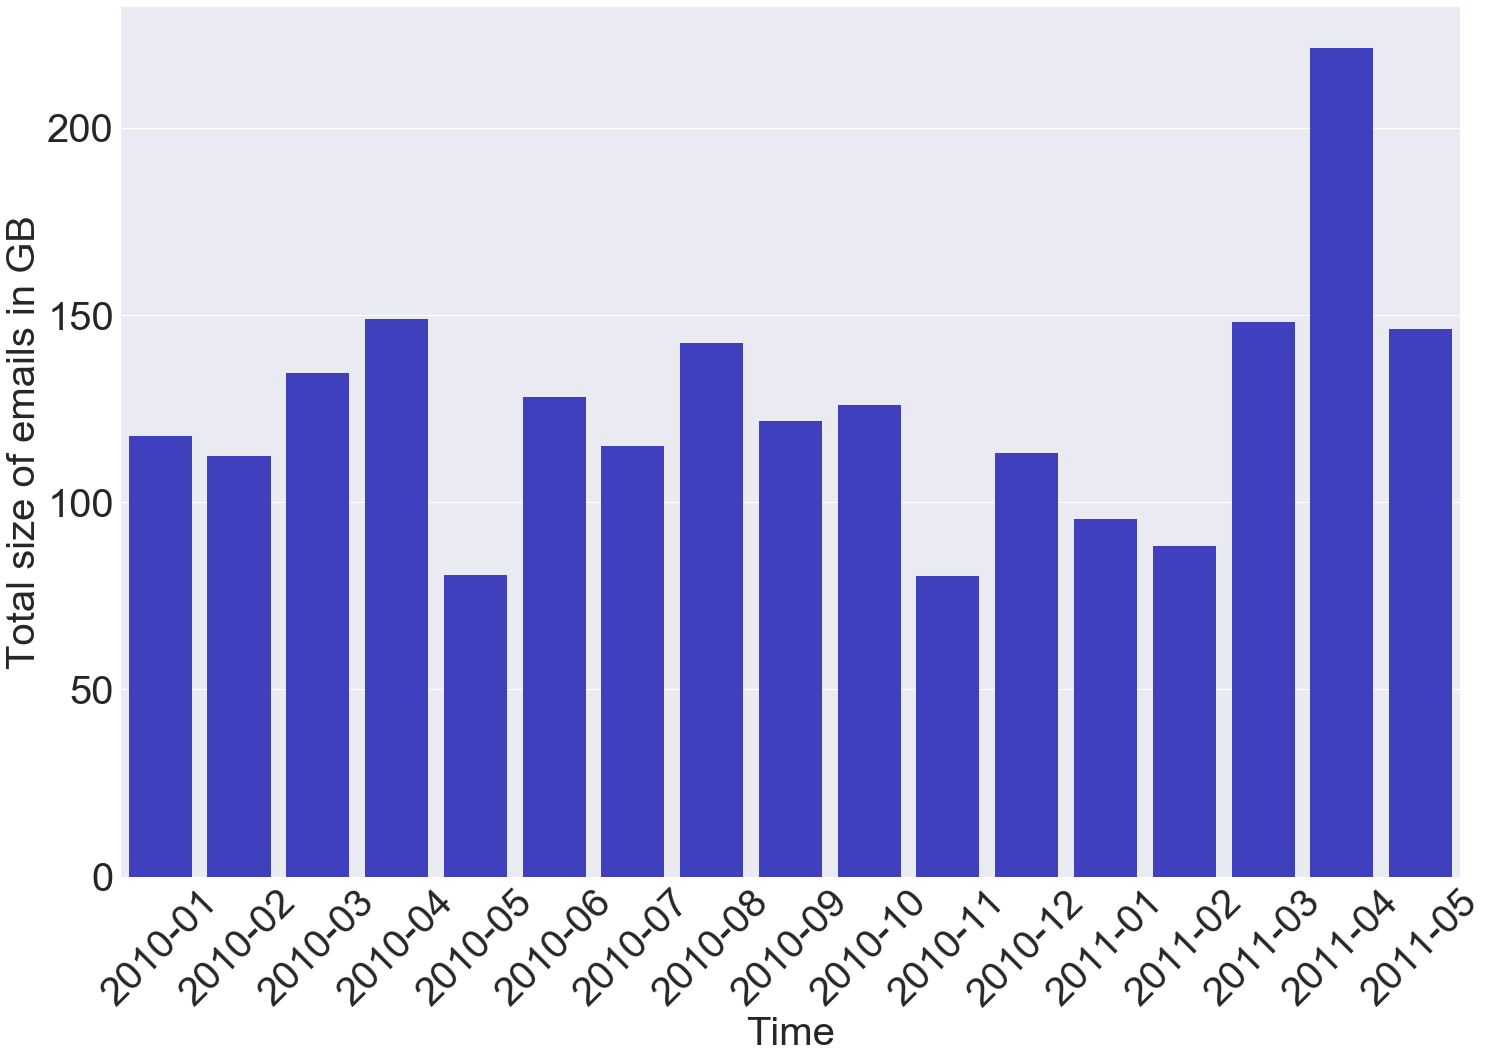

In [12]:
fig, ax = plt.subplots()
sns.barplot(data = emails_per_month, x = "ds", y = "y", color = "blue", saturation = .5)
ax.set_xticklabels(labels = emails_per_month.ds, rotation = 45)
ax.set_xlabel('Time')
ax.set_ylabel('Total size of emails in GB');

Now let's look at the case where the insider sent email IP from their employee account to their home account. Visualizing this data shows some interesting trends towards the end of the analysis period. The attachment size increases drastically in March and April of 2011.

In [13]:
df_insider_non_org = df_insider[~df_insider['to'].str.contains('dtaa.com')]
df_insider_ewing = df_insider_non_org[df_insider_non_org['to'] == 'Ewing_Carlos@comcast.net']
df = df_insider_ewing.resample('1M', on='date').sum().reset_index()
df.columns = ["ds", "y"]
df.y = df.y/1e6

In [14]:
df["ds"] = df["ds"].apply(lambda x: x.strftime('%Y-%m')).astype(str)

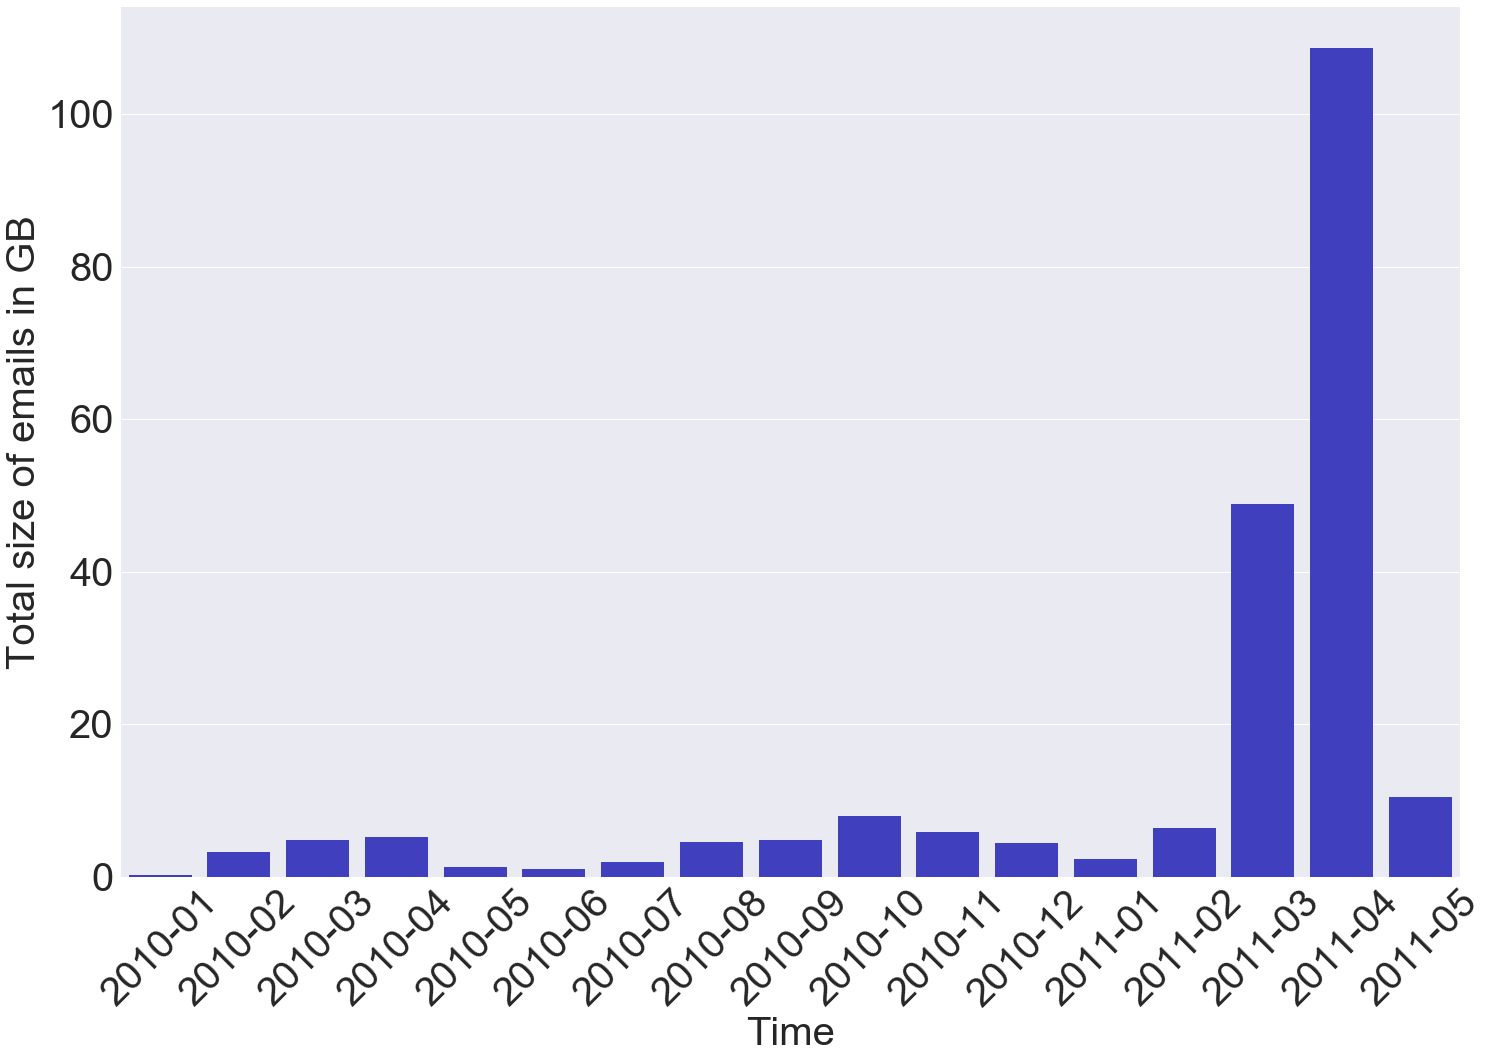

In [15]:
fig, ax = plt.subplots()
sns.barplot(data = df, x = "ds", y = "y", color = "blue", saturation = .5)
ax.set_xticklabels(labels = df.ds, rotation = 45)
ax.set_xlabel('Time')
ax.set_ylabel('Total size of emails in GB');

In [48]:
xs = LinearScale()
ys = LinearScale()
x = df.index
y = df.attachment_size/1e6

tt = Tooltip(fields = ["index", "name"], formats = ["", "0.2f"], labels = ["User ID", "Email Size"])

scatter_chart = Scatter(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red'], 
            tooltip = tt, display_legend = False, labels = ["email"], interactions = {"hover" : "tooltip"})

x_ax = Axis(scale=xs, label='x', grid_lines='solid')
y_ax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', 
            label='Email attachment size (GB)', grid_lines='solid')

# panzoom = PanZoom(scales={'x': [xs], 'y': [ys]})
Figure(marks=[scatter_chart], axes=[x_ax, y_ax], animation_duration=1000, 
      title = "Email attachment size")

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='Email attachment size (GB)', orientation='vertical', scale=LinearScale(), tick_format='0.2f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['red'], interactions={'hover': 'tooltip'}, labels=['email'], scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip=Tooltip(fields=['index', 'name'], formats=['', '0.2f'], labels=['User ID', 'Email Size']), tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), y=array([ 0.045659,  0.034142,  1.310925,  0.023043,  0.02521 ,  0.174788,
        0.029505,  2.834225,  0.027163,  0.020269,  0.020269,  0.021024,
        0.019822,  0.022858,  0.045215,  0.031594,  0.041923,  0.022795,
        1.734457,  0.036707,  0.022669,  0.039442,  0.032645,  0.021056,
        0.024111,  0.024111,  1.177519,  0.060538,  0.023459,  0.016879,
        2.814307,  0.017758,  0.020866,  0.045077,  0.068177,  0.020332,
        0.030145,  0.026239,  0.014765,  0.031457,  0.049807,  0.020845,
        0.03428 ,  3.490051,  0.028098,  0.025452,  0.024064,  0.02821 ,
        0.018942,  0.032395,  0.186355,  0.013332,  0.035062,  2.10817 ,
        1.13665 ,  0.022995,  0.036007,  0.028515,  0.035175,  0.042583,
        0.022995,  0.026563,  3.288783,  0.032437,  0.016856,  0.044239,
        0.028235,  0.019207,  0.034761,  2.171576,  2.158695,  0.026563,
        0.039991,  0.049845,  0.026552,  0.04939 ,  0.0272  ,  0.029922,
        0.028814,  1.994018,  0.035182,  0.028719,  0.019419,  0.033979,
        0.042345,  0.022491,  0.028305,  0.037956,  0.062386,  0.034539,
        0.024387,  0.022476,  1.519906,  0.022446,  0.061162,  0.024387,
        0.03077 ,  0.026059,  0.029883,  0.034952]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Email attachment size')

Let's select one user in particular who is a known insider.


In [51]:
emails_per_month = df.resample(rule = "1M", on = "timestamp").sum().reset_index()
emails_per_month["date"] = pd.to_datetime(emails_per_month["timestamp"], format = "%Y-%m-%d")
emails_per_month

,timestamp,attachment_size,date
0,2010-01-31,30708524,2010-01-31


In [37]:
emails_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
timestamp          1 non-null datetime64[ns]
attachment_size    1 non-null int64
date               1 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 104.0 bytes


In [43]:
xs = DateScale()
ys = LinearScale()
x = emails_per_month.timestamp
y = emails_per_month.attachment_size/1e6

bar_chart = Bars(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red'], 
            tooltip = tt, display_legend = False, labels = ["email"], interactions = {"hover" : "tooltip"})

x_ax = Axis(scale=xs, label='Months of the Year', tick_format='%b-%d', grid_lines='solid')
y_ax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', 
            label='Number of Emails', grid_lines='solid')

# tt = Tooltip(fields = ["index", "name"], formats = ["", "0.2f"], labels = ["User ID", "Email Size"])
# panzoom = PanZoom(scales={'x': [xs], 'y': [ys]})

Figure(marks=[bar_chart], axes=[x_ax, y_ax], animation_duration=1000, 
      title = "Number of Emails sent Monthly")

Figure(animation_duration=1000, axes=[Axis(label='Months of the Year', scale=DateScale(), tick_format='%b-%d'), Axis(label='Number of Emails', orientation='vertical', scale=LinearScale(), tick_format='0.2f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Bars(colors=['red'], interactions={'hover': 'tooltip'}, labels=['email'], scales={'x': DateScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip=Tooltip(fields=['index', 'name'], formats=['', '0.2f'], labels=['User ID', 'Email Size']), tooltip_style={'opacity': 0.9}, x=array(['2010-01-31T00:00:00.000000000'], dtype='datetime64[ns]'), y=array([ 1.643272]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Number of Emails sent Monthly')